In [1]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd
from pprint import pprint
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import StratifiedKFold
from scipy import stats
import numpy as np
from sklearn import linear_model, svm
import re
from sklearn.metrics import roc_curve, auc,f1_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
#s = "../braindata/data_1_mor_select_100.csv"
import os          
from sklearn import linear_model, svm
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
import pickle
import os
import scipy.io
from scipy import stats

import pandas as pd
from numpy import *

import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
import argparse
from sklearn.model_selection import GridSearchCV, cross_val_score,cross_val_predict,StratifiedKFold,KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score,confusion_matrix, mean_squared_error,precision_score,recall_score,f1_score,hamming_loss
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
print('finished this block')

finished this block


In [2]:
os.getcwd()
os.chdir('../data/adni')
print('finished this block')

finished this block


In [3]:
dd =pd.read_csv("combine_new_biomarker_correct.csv",header=0)
print('the original training data dimension is')
print(dd.shape)
import csv

the original training data dimension is
(179, 34733)


In [4]:
names=list(dd)
start_index_conn=names.index('T1')


In [66]:
with open('combine_new_biomarker.csv', 'r') as f:
    d_reader = csv.DictReader(f)
    #get fieldnames from DictReader object and store in list
    headers = d_reader.fieldnames
    
data=np.array(dd)
#idx_IN_columns = np.append(np.array([9,10]),np.array(range(start_index_conn,data.shape[1])))

#print(idx_IN_columns)

X_conn=data[:,start_index_conn:]  #Connectome features
X_biomarker=data[:,1:6] # Biomarker features
y_baseline=data[:,10]  #baseline 1 is normal  2 MCI  3 is AD
y_final=data[:,9]   #Finaldx # 0 is Not-AD  1 is AD 


#print(y_final)
#print(y_baseline)


y=np.zeros(y_baseline.shape)
#print(len(y))

for i in range(0,len(y)):
    if y_baseline[i]==1:
#         if y_final[i]==1:
#             y[i]=0
#         else:
            y[i]=0
    elif y_baseline[i]==2:
        if y_final[i]==0:
            y[i]=1 #stable MCI
        else:
            y[i]=2 # Converted MCI 
    else: 
        y[i]=3 

        
# X_marker=X[:,2:]

ind_num_matrix=np.isnan(X_conn)
ind_num_vector=np.any(ind_num_matrix,axis=1)

X_no_nan=X_conn[~ind_num_vector,:]
y_no_nan=y[~ind_num_vector]

X_conn_final=X_no_nan
y=y_no_nan        
        
        
        
        

feature_num_all=[]

lr_all_feature=[]
svm_all_feature=[]
XGreg_all_feature=[]


lr_fls_feature=[]
svm_fls_feature=[]
XGB_f1s_feature=[]

base_labels= []
# np.isnan(X).any()

# np.isnan(X).any()
#X[np.isnan(X_)] = np.median(X[~np.isnan(X)])

print("after the precoessing, the X.shape is ")
print(X_conn_final.shape)
print("the y.shape is")
print(y.shape)

X=X_biomarker
X[np.isnan(X)] = np.median(X[~np.isnan(X)])

after the precoessing, the X.shape is 
(179, 34709)
the y.shape is
(179,)


In [10]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler


In [67]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X.astype(np.float64))

In [76]:
clf = ExtraTreesClassifier(n_estimators=250,random_state=0)
rs=33994
outer_cv = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=rs)
for train_index, test_index in outer_cv.split(X_scaler, y):
    X_train, X_test = X_scaler[train_index], X_scaler[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))
    ovo_clf.fit(X_train,y_train)
    ovo_clf.predict(X_train)

/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users

In [77]:
cross_val_score( ovo_clf,X_train,y_train,cv=3)

/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users

array([0.36585366, 0.34146341, 0.30769231])

In [79]:
y_train_pred=cross_val_predict(ovo_clf,X_train,y_train,cv=10)
conf_mx=confusion_matrix(y_train,y_train_pred)

/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users

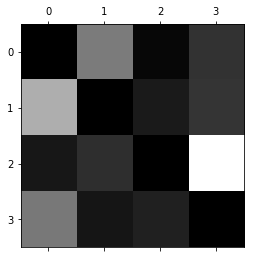

In [81]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [82]:
norm_conf_mx


array([[0.        , 0.35416667, 0.02083333, 0.14583333],
       [0.5       , 0.        , 0.07692308, 0.15384615],
       [0.06666667, 0.13333333, 0.        , 0.73333333],
       [0.34375   , 0.0625    , 0.09375   , 0.        ]])

In [ ]:
n_fold = 3

all_TP = []
all_TN = []
all_FP = []
all_FN = []

all_acc = []
all_sen = []
all_spec = []
all_auc = []

all_roc_label = []
all_roc_pred = []
all_roc_prob = []

#rs_list=[33994,31358,27381,8642,7012,42023,44642,44002,30706,12571]
rs_list=[33994]
for rs in rs_list:
        print('********random seed:{}'.format(rs))

        inner_cv = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=rs)
        outer_cv = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=rs)

        scaler = StandardScaler()
        #scaler = RobustScaler()
        scaler.fit(X)
        X = scaler.transform(X)

        avg_acc = []
        avg_TP = []
        avg_TN = []
        avg_FP = []
        avg_FN = []
        avg_sen = []
        avg_spec = []
        avg_auc = []


        roc_label = []
        roc_pred = []
        roc_prob = []
        
        for train_index, test_index in outer_cv.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            # 'featureExtract__n_estimators': np.arange(10, 100, 10),
            
            #grid1######################################
            #params = {'randomforest__min_samples_leaf': np.arange(1, 51, 5),
            #          'randomforest__n_estimators': np.arange(10, 100, 10)}
            
            #grid2######################################
            #params = {'randomforest__min_samples_leaf': np.arange(1, 51, 1),
            #          'randomforest__n_estimators': np.arange(10, 500, 10)}
            
            #grid3######################################
            params = {'randomforest__min_samples_leaf': np.arange(1, 51, 5),
                      'randomforest__n_estimators': np.arange(10, 500, 10)}
            
#             params_svm = [
#                     {'randomforest__min_samples_leaf': np.arange(1, 51, 5),
#                       'randomforest__n_estimators': np.arange(10, 100, 10)},
#                     {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}                
#             ]
            
            #pipe = Pipeline([
            #    ('featureExtract', SelectFromModel(ExtraTreesClassifier())),
            #    ('randomforest', RandomForestClassifier())
            #])
            
            pipe_rf = Pipeline([
                ('featureExtract', SelectFromModel(ExtraTreesClassifier())),
                ('randomforest', RandomForestClassifier())
            ])

            
            
            #clf = GridSearchCV(estimator=pipe, param_grid=params, cv=inner_cv, scoring='accuracy',n_jobs=8)
            clf = GridSearchCV(estimator=pipe_rf, param_grid=params, cv=inner_cv,scoring='accuracy', n_jobs=-1)
            clf.fit(X_train, y_train)

            
          

In [ ]:
print("Begin SVM")

In [ ]:

sep1 = '*' * 100
sep2 = '*' * 50
sep3 = '*' * 30

print("beginning selection best number of features")
n_features = [10,30,50,70,80,100,1000,2000]




rbf = svm.SVC(C=10,kernel='rbf',gamma=0.01)

for i in n_features:
    print("\n\n Number of Feature: {} {} \n".format(i, sep1))
      
    SVM_all_accs_one_feature  = []
    SVM_all_f1s_one_feature = []
    base_labels=[]
    
    for runs in range(1):
        counter=0
        print("\n RUN: {} {} \n".format(runs, sep3))
        
        SVM_accuracies = []
        SVM_f1s=[] 
        strat_labels = []
        
        skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=int(runs))
        for train_index, test_index in skf.split(X, y):       
            print("\n Fold: {} {} \n".format(counter, sep2))        
            counter=counter+1
                        
            train_data_origin, test_data_origin=X[train_index], X[test_index]
            train_labels, test_labels = y[train_index], y[test_index]
            strat_labels = np.append(strat_labels, test_labels)

 #           print("Random forest for feature selection")
            clf = ExtraTreesClassifier(n_estimators=250,random_state=0)
            clf = clf.fit(train_data_origin, train_labels)
            importances = clf.feature_importances_
            indices = np.argsort(importances)[::-1]        
            
            index=indices[0:i]
            train_data=train_data_origin[:, index]
            test_data=test_data_origin[:, index]
                                     
        #SVM
            rbf = rbf.fit(train_data, train_labels)
            svm_acc = rbf.score(test_data, test_labels)
            
            
            
            
            #f1 calculation
            y_pred = rbf.predict(test_data)
            
            print(y_pred)
            print(test_labels)
            
            svm_f1 = f1_score(test_labels, y_pred, average='macro')
            
                
            print('SVM Accuracy: %f' % svm_acc)
            print('SVM F1 score: %f' % svm_f1)
                    
            SVM_accuracies = np.append(SVM_accuracies, svm_acc)
            SVM_f1s=np.append(SVM_f1s, svm_f1)             
                            
        base_labels=np.append(base_labels, strat_labels)        
        SVM_all_accs_one_feature=np.append(SVM_all_accs_one_feature, np.mean(SVM_accuracies))
        #SVM_all_f1s_one_feature =np.append(SVM_all_f1s_one_feature, np.mean(SVM_f1s)) 

    print("SVM###############################################################")
    print("Runs Avg Accuracies: {}".format(np.mean(SVM_accuracies)))
    print("Standard Deviation: {}".format(np.std(SVM_accuracies)))
    #print("Runs Avg F1: {}".format(np.mean(SVM_f1s)))
    #print("Standard Deviation: {}".format(np.std(SVM_f1s)))
    


In [ ]:
print('begin logistic regression')

In [ ]:
sep1 = '*' * 100
sep2 = '*' * 50
sep3 = '*' * 30

print("beginning selection best number of features")
n_features = [10,30,50,70,80,100,1000,2000]

logistic = linear_model.LogisticRegression(C=1e5)

for i in n_features:
    print("\n\n Number of Feature: {} {} \n".format(i, sep1))
      
    LR_all_accs_one_feature  = []
    LR_all_f1s_one_feature = []


    base_labels=[]
    
    for runs in range(1):
        counter=0
        print("\n RUN: {} {} \n".format(runs, sep3))
        
        LR_accuracies = []
        LR_f1s=[]    
    

        strat_labels = []
        
        logistic = linear_model.LogisticRegression(C=1e4)

        skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=int(runs))
        for train_index, test_index in skf.split(X, y):       
            print("\n Fold: {} {} \n".format(counter, sep2))        
            counter=counter+1
                        
            train_data_origin, test_data_origin=X[train_index], X[test_index]
            train_labels, test_labels = y[train_index], y[test_index]
            strat_labels = np.append(strat_labels, test_labels)

 #           print("Random forest for feature selection")
            clf = ExtraTreesClassifier(n_estimators=250,random_state=0)
            clf = clf.fit(train_data_origin, train_labels)
            importances = clf.feature_importances_
            indices = np.argsort(importances)[::-1]        
            
            index=indices[0:i]
            train_data=train_data_origin[:, index]
            test_data=test_data_origin[:, index]
                             
            #Logistic Regression
            log = logistic.fit(train_data, train_labels)
            log_acc = log.score(test_data, test_labels)

            #f1 calculation            
            y_pred = logistic.predict(test_data)            
            log_f1 = f1_score(test_labels, y_pred, average='macro')

            print('Logistic Regression Accuracy: %f' % log_acc)
            print('Logistic Regression F1 score: %f' % log_f1)
                            
            LR_accuracies = np.append(LR_accuracies, log_acc)
            LR_f1s=np.append(LR_f1s, log_f1)        
                      
        base_labels=np.append(base_labels, strat_labels)        
        LR_all_accs_one_feature=np.append(LR_all_accs_one_feature, np.mean(LR_accuracies))
        LR_all_f1s_one_feature =np.append(LR_all_f1s_one_feature, np.mean(LR_f1s))    
    


    print("LR###############################################################")
    print("Runs Avg Accuracies: {}".format(np.mean(LR_accuracies)))
    print("Standard Deviation: {}".format(np.std(LR_accuracies)))
    print("Runs Avg F1: {}".format(np.mean(LR_f1s)))
    print("Standard Deviation: {}".format(np.std(LR_f1s)))



In [ ]:
print('begin XGboost')

In [ ]:
sep1 = '*' * 100
sep2 = '*' * 50
sep3 = '*' * 30

print("beginning selection best number of features")
n_features = [10,30,50,70,80,100,1000,2000]


param={}
param['objective'] = 'multi:softmax'

param['eta'] = 0.1
param['max_depth'] = 6
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = 6

for i in n_features:
    print("\n\n Number of Feature: {} {} \n".format(i, sep1))
      
    XGB_all_accs_one_feature  = []
    XGB_all_f1s_one_feature = []


    base_labels=[]
    
    for runs in range(10):
        counter=0
        print("\n RUN: {} {} \n".format(runs, sep3))
        
        XGB_accuracies = []
        XGB_f1s=[]    
    

        strat_labels = []
        
        skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=int(runs))
        for train_index, test_index in skf.split(X, y):       
            print("\n Fold: {} {} \n".format(counter, sep2))        
            counter=counter+1
                        
            train_data_origin, test_data_origin=X[train_index], X[test_index]
            train_labels, test_labels = y[train_index], y[test_index]
            strat_labels = np.append(strat_labels, test_labels)

 #           print("Random forest for feature selection")
            clf = ExtraTreesClassifier(n_estimators=250,random_state=0)
            clf = clf.fit(train_data_origin, train_labels)
            importances = clf.feature_importances_
            indices = np.argsort(importances)[::-1]        
            
            index=indices[0:i]
            train_data=train_data_origin[:, index]
            test_data=test_data_origin[:, index]
            
            xgb_train_data=xgb.DMatrix(train_data, label=train_labels)
            xgb_test_data=xgb.DMatrix(test_data, label=test_labels)
            
                             
            #Logistic Regression
            watchlist=[(xgb_train_data, 'train'), (xgb_test_data, 'test')]
            num_round=5
            bst = xgb.train(param, xgb_train_data, num_round, watchlist)
            y_pred = bst.predict(xgb_test_data)

            print(y_pred)
            
            print(test_labels)
            
            print(np.sum(y_pred == test_labels))
            
            print(test_labels[0])
            
            xgb_acc = np.sum(y_pred == test_labels) / test_labels.shape[0]           

            #f1 calculation
            xgb_f1 = f1_score(test_labels, y_pred, average='macro')

            print('XGB Regression Accuracy: %f' % xgb_acc)
            print('XGB Regression F1 score: %f' % xgb_f1)
                            
            XGB_accuracies = np.append(LR_accuracies, log_acc)
            XGB_f1s=np.append(LR_f1s, log_f1)        
               
        base_labels=np.append(base_labels, strat_labels)        
        XGB_all_accs_one_feature=np.append(LR_all_accs_one_feature, np.mean(LR_accuracies))
        XG_all_f1s_one_feature =np.append(LR_all_f1s_one_feature, np.mean(LR_f1s))    

    #print("LR###############################################################")
    #print("Runs Avg Accuracies: {}".format(np.mean(LR_accuracies)))
    #print("Standard Deviation: {}".format(np.std(LR_accuracies)))
    #print("Runs Avg F1: {}".format(np.mean(LR_f1s)))
    #print("Standard Deviation: {}".format(np.std(LR_f1s)))
